# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from math import sqrt, erf

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




Como o obejto é saber a diferença entre os dois metodos o teste que vai ser utilizado é o Bicaudal, pois não quero saber se é maior(Unilareal a direita) ou se é menor(Unilateral a esquerda).

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [14]:
# Cálculo das médias
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

# Cálculo das variâncias amostrais (ddof=1)
variancia_A = np.var(amostra_estrategia_A, ddof=1)
variancia_B = np.var(amostra_estrategia_B, ddof=1)

print("Média Estratégia A:", media_A)
print("Média Estratégia B:", media_B)
print("Variância Estratégia A:", variancia_A)
print("Variância Estratégia B:", variancia_B)


Média Estratégia A: 71.40559272313098
Média Estratégia B: 74.74868110507046
Variância Estratégia A: 129.2654943565623
Variância Estratégia B: 110.4700206552835


Calculando a media dos valore verificamos que media da amostra B com o valor suporrior a da amostra A, assim temos uma pequena diferença sobre de quase 3 pontos na média das prova na estrategia B

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [17]:
# Desvios padrão populacionais
sigma_A = 10
sigma_B = 12

n_A = len(amostra_estrategia_A)
n_B = len(amostra_estrategia_B)

# Cálculo do erro padrão da diferença
erro_padrao = sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))

# Estatística Z
z_stat = (media_A - media_B) / erro_padrao

# Função CDF da normal padrão
def normal_cdf(x):
    return 0.5 * (1 + erf(x / sqrt(2)))

# p-value bicaudal
p_value = 2 * (1 - normal_cdf(abs(z_stat)))

# Impressão dos resultados
print("Estatística Z:", z_stat)
print("p-value:", p_value)

# Decisão
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há diferença significativa entre as médias.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência de diferença significativa entre as estratégias.")

Estatística Z: -1.513345003724835
p-value: 0.1301920468224016
Não rejeitamos a hipótese nula: não há evidência de diferença significativa entre as estratégias.


Embora a Estratégia B apresente uma média maior que a Estratégia A, essa diferença não é estatisticamente significativa ao nível de 5%.

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

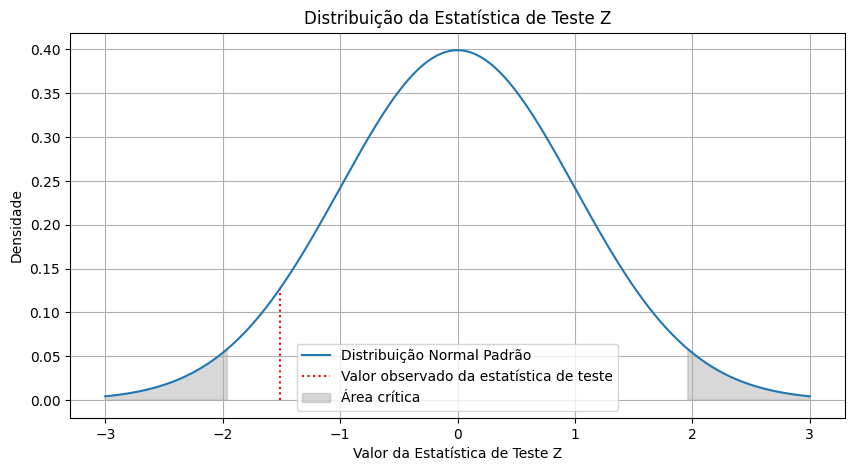

In [18]:
# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Valores de X e Y para plotar a distribuição
x = np.linspace(-3, 3, 1000)
# x = np.linspace(-3, 3, 1000): Esta linha cria um array x de 1000 pontos igualmente espaçados no intervalo de -3 a 3. Esse intervalo foi escolhido para abranger uma ampla gama de valores típicos para a estatística de teste Z, que segue uma distribuição normal padrão
y = stats.norm.pdf(x, 0, 1)
# y = stats.norm.pdf(x, 0, 1): Esta linha calcula os valores de densidade de probabilidade para cada ponto no array x com base na distribuição normal padrão.

# Plotando a distribuição normal padrão
ax.plot(x, y, label='Distribuição Normal Padrão')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[z_stat], ymin=0, ymax=stats.norm.pdf(z_stat, 0, 1),
          colors='r', linestyles='dotted', label='Valor observado da estatística de teste')

# Área crítica
critical_region = stats.norm.ppf(0.025), stats.norm.ppf(0.975)
ax.fill_between(x, y, where=(x < critical_region[0]) | (x > critical_region[1]), color='gray', alpha=0.3, label='Área crítica')

# Legenda e rótulos
plt.legend()
plt.xlabel('Valor da Estatística de Teste Z')
plt.ylabel('Densidade')
plt.title('Distribuição da Estatística de Teste Z')
plt.grid(True)

# Exibindo o gráfico
plt.show()

Assim podemos verificar que o valor Z não esta na area critica, sendo que a area critrica começa nos valores 1,96.
Isso reforça a informação para não rejeitarmos a Hipótese Nulo, pois o valor Z não é extremo o suficiente para indicar uma diferença significativa.